In [77]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [78]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [79]:
len(x_train)


60000

In [80]:
len(x_test)

10000

In [81]:
x_train[0].shape


(28, 28)

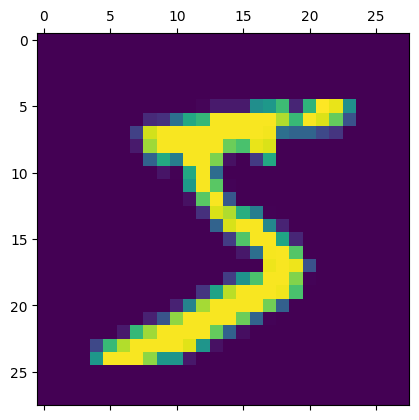

In [82]:
plt.matshow(x_train[0])

In [83]:
y_train[0]

5

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
x_train = x_train/255
x_test = x_test/255

In [86]:
x_trainflat = x_train.reshape(len(x_train),28*28)

In [87]:
x_testflat = x_test.reshape(len(x_test),28*28)


In [88]:
y_train[0]

5

In [89]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
 
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.fit(x_trainflat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1203 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9845


In [90]:
y_predict = model.predict(x_testflat)

313/313 [==============================] - 1s 2ms/step


In [91]:
y_predict[0]

array([2.3441571e-04, 5.8824511e-04, 1.8418892e-01, 9.0241897e-01,
       1.0182187e-06, 5.3635859e-03, 7.5929300e-08, 9.9998087e-01,
       5.2161351e-02, 4.5197498e-02], dtype=float32)

In [92]:
np.argmax(y_predict[0])

7

In [93]:
y_test[0]

7

In [94]:
y_predictlabel = [np.argmax(i) for i in y_predict]

In [95]:
y_predictlabel[:5]

[7, 2, 1, 0, 4]

In [96]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [97]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predictlabel)

In [98]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    1,    1,    0,    1,    2,    2,    2],
       [   0, 1129,    2,    1,    0,    1,    1,    0,    1,    0],
       [   6,    2,  999,    6,    2,    1,    3,    3,   10,    0],
       [   1,    0,    1,  991,    0,    6,    0,    6,    3,    2],
       [   3,    0,    2,    1,  961,    1,    2,    3,    1,    8],
       [   3,    3,    0,   11,    1,  860,    7,    1,    4,    2],
       [   5,    4,    1,    1,    4,    5,  935,    0,    3,    0],
       [   0,    8,    9,    4,    0,    1,    0,  996,    0,   10],
       [   6,    1,    1,    7,    3,    8,    1,    4,  939,    4],
       [   1,    8,    0,    6,    8,    1,    0,    4,    2,  979]])>

Text(95.72222222222221, 0.5, 'Truth')

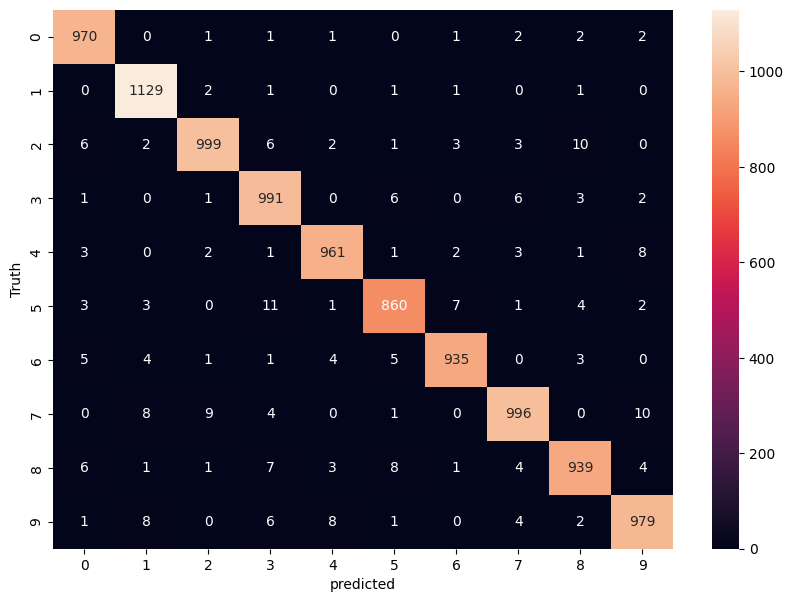

In [99]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [100]:
model.get_weights()

[array([[-0.04909047, -0.03682936, -0.01038279, ..., -0.04220958,
          0.01009327, -0.07642456],
        [-0.03764492,  0.05180451,  0.08037043, ...,  0.0459778 ,
          0.00492685, -0.05622272],
        [-0.02145389, -0.0461564 , -0.01630774, ...,  0.01393355,
          0.03033738, -0.00487986],
        ...,
        [-0.03187615, -0.07264499,  0.07456394, ...,  0.01291762,
         -0.01066757, -0.06754624],
        [-0.01762038,  0.03175166, -0.06052575, ...,  0.06939365,
          0.07542503,  0.06113994],
        [-0.02484313,  0.05035146, -0.05352108, ...,  0.07117018,
          0.0453379 ,  0.05757301]], dtype=float32),
 array([ 0.03084322,  0.01005523,  0.08560001, -0.06013582,  0.00275378,
         0.00379179,  0.00462428,  0.00196987,  0.04608804,  0.02910517,
         0.09089965,  0.00041546, -0.01654727,  0.02126304,  0.06178626,
        -0.01528017,  0.08197109,  0.06975853,  0.00238721,  0.0273734 ,
        -0.0321292 ,  0.1927359 ,  0.09114463, -0.08104711,  0.018